$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
$$

# Sessile Drop Problem

We want to compute the shape of a drop sitting on top of a plate. The problem is 2d. The drop has an area of A_D and a contact angle $\alpha$.

<div class="Figure">
<a name="fig1"></a><img src="pics/sessile drop.png" width=250> <p>
Figure 1:
</div>

We parameterize the drop by using the angle to the horizontal $\Psi$, where $\Psi=0$ is at the apex of the drop and $\Psi=\alpha$ is at its base. Thus the drop shape is given by the two functions

\begin{eqnarray}
x=X(\Psi)\tag{1}\\
y=Y(\Psi)
\end{eqnarray}

with $0\le\Psi\le \alpha$. Using the specific coordinate system $(x,y)$ as shown in [Fig.1](#fig1) we can relate angle $\Psi$ with $X$ and $Y$ as

$$\cot \Psi=-\fud{Y(\Psi)}{X(\Psi)}\tag{2}$$

The Young-Laplace equation relates the curvature (which is function of $\Psi$) with the spatial coordinate in a gravity field.

$$\kappa=-\frac{X}{l^2} + B\quad ,\tag{3}$$

where $l$ is the capillary length. To relate Eq. (2) with $\Psi$ and then eventually with $X$ and $Y$ we need to use the definition of the curvature for function in 2d.

$$\kappa=\frac{1}{f'}\left(\frac{1}{\sqrt{1+(f')^2}}\right)'\quad,\tag{4}$$

where $f'$ stands for $df/dx$ and $'$ for $d/dx$. It is clear that

$$f'=\fud{Y}{X}=-\cot \Psi\tag{5}$$

If we insert Eq. (5) into the definition for the curvature, Eq. (4), we obtain 

$$\kappa=-\frac{1}{\cot \Psi} \fud{}{X}\left( \frac{1}{\sqrt{1+\cot^2\Psi}}\right)=
-\frac{1}{\cot \Psi} \fud{}{X} \left(\sin\Psi\right)=-\frac{1}{\cot \Psi} \cos \Psi \fud{\Psi}{X}\tag{6}\quad.$$

Thus 

$$\kappa=-\sin \Psi \fud{\Psi}{X}\tag{7}$$

which we combine with Eq. (3) to obtain 

$$\sin \Psi \fud{\Psi}{X}= \frac{\kappa}{l^2} - B\tag{8}$$

and solve for 

$$\fud{X}{\Psi}=\frac{\sin \Psi}{Q}\tag{9}$$ 

with 

$$Q=\frac{X}{l^2}-B\tag{10}$$

Equation (9) is an ordinary differential equation for the x-coordinate of the droplet shape. For the y-coordinate we can formulate a similar equation using Eq. (2) and the chain rule:

$$\cot \Psi = -\fud{Y}{X}=-\fud{Y}{\Psi}\,\fud{\Psi}{X}\tag{11}$$

which results after inserting $d\Psi/dX$ from Eq. (9) into Eq. (11) gives

$$\fud{Y}{\Psi}=-\frac{\cos \Psi}{Q}\quad.\tag{12}$$ 

This is our second ordinary differential equation (ODE). We need therefore 2 initial conditions. These are

\begin{eqnarray}
X(0)&=&0\tag{13a}\\
Y(0)&=&0\quad .\tag{13b}
\end{eqnarray}

But that is not enough, as we do not know the constant $B$. How do we obtain this? 
We still have the droplet area $A_D$ which is a function of $B$. In the program below, the set of two ODE's

\begin{eqnarray*}
\fud{Y}{\Psi}&=&-\frac{\cos \Psi}{Q}\quad.\tag{14b}\\
\fud{X}{\Psi}&=&\frac{\sin \Psi}{Q}\tag{14b}\\
& & \mathrm{with}\quad X(\Psi=0)=0 \quad \mathrm{and}\quad Y(\Psi=0)=0 \quad .
\end{eqnarray*}

The constrain is

$$A_D=2\cdot\int_0^d Y\,dx\quad.\tag{15}$$

with d being the height of the droplet. The height of the droplet is known as the difference between the maximum and the minimum $Y$ value. The minimum $Y$ value is obtained for $Y(\Psi=\alpha)$. Let's have a look at the program to see how the ODE is solved under the constrain Eq. (15).


## Program to solve sessile droplet problem

We start with the boilder plates, a few more as before as we need some utilities to solve the ODE (Eq. 14) and fullfill the contstrain (Eq. 15).

In [8]:
%matplotlib inline
import matplotlib.pylab as plt #plotting
import numpy as np #linspace and array
from scipy.integrate import odeint #ODE integration
from scipy.optimize import fmin #find minimum of a function using clever algorithms
from math import * #mathematical functions

Then we need to specify our variables:

In [12]:
rho = 3e3    #density difference droplet and surrounding liquid
gamma = 0.07  #surface tension coefficient
g = 40.      #gravitational acceleration
l = sqrt(gamma/g/rho) #capillary number

AD = pi*1e-3**2/2. #area of the droplet
alpha =.8*pi #contact angle
#Psi we want to calculate
psis = np.linspace(0., alpha, 100.) #List of psi's

We can get obtain a first approximation of $B$ from Eq. (3). But what is the radius of a bubble with area ``AD`` and contact angle $\alpha$. This is not too hard to calculate yourself, yet you may have a look at this [website](https://en.wikipedia.org/wiki/Circular_segment). The result is the following:

In [13]:
r=sqrt(AD/(alpha-0.5*sin(2*alpha))) #area of a cut circle with contact angle alpha

Then we can set the initial $B$ variable. ``InitialB`` is the first $B$ and ``B`` is a global variable used for the constrain function ``findB()``.

In [14]:
initialB=B=1/r

#Initial value for X and Y
yinit = np.array([0,0])

The variable ``yinit`` is the initial condition for our ODE solver, see Eqs. (13a) and (13b).

Next we need to define the ODE function to solve for; actually there are two functions to solve, Eqs. (14a) and (14b).
The coding is rather straightforward, we return a ``np.array`` with the 1st element being $dX/d\Psi$ and the second $dY/d\Psi$. The function arguments are ``X=y[0]`` and ``Y=y[1]``, and the value of the parameter $\Psi$.

In [15]:
#ODE to integrate the droplet surface in X and Y direction as a function of psi
def droplet_ode(y,psi):
    Q = y[0]/(l**2)-B
    dxdpsi = sin(psi)/Q
    dydpsi = -cos(psi)/Q
    return np.array([dxdpsi,dydpsi])

Now we need to handle the constrain, namely that we have to find a $B$ values which gives us the correct area of the droplet $A_D$. This is done with a high level function which can find the minimum of a function and the implementation of the function. As we must find a minimum of the functuion we use as a cost function to be minimized the difference between the given area $A_D$ and the calculated area with the guessed $B$. Ok, let's start.
The function to be minimized is named ``findB()`` and receives as argument a guess for the value as ``b``.

In [16]:
#return value is the error between given and the calculated area
def findB(b):
    global B #Python assumes without global derective that B would be a local variable
    B = b[0] #b is an array of size 1, but B a float
    
    #solve the ODE with initial values and for the psis
    yy = odeint(droplet_ode, yinit, psis) 
    
    #Calculate the drop area for the solved droplet
    droparea = 2*np.trapz(np.fabs(yy[:,1]), x=np.fabs(yy[:,0]))
    
    #return the distance (error) between the calculated droparea and the real droparea 
    return fabs(AD-droparea)

Let's have a look at ``findB()`` function carefully. The first two lines do some magic (explain below and ignore for now). The the function ``odeint()``integrates the ODE named ``droplet_ode()`` starting with the initial values defined by ``yinit`` for all values of ``psis``. We have developed a simple solver for pathlines usinge the [Euler method](02a_Euler Method.ipynb). ``odeint()`` uses something similar yet more sophisticated (it is the ``LSODA`` solver from the Fortran written [ODEPACK](https://computation.llnl.gov/casc/odepack/) routines). 

With the solution in the array ``yy`` we calculate the area of the droplet, see Eq. (15). The integration is using the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule). ``np.fabs`` is needed to get positive areas from negative ``x`` values. 

The function returns the absolute of the difference between the given area ``AD`` and the calculates area ``droparea``. This approaches a minimum.

The function ``findB()`` is called with different values of ``b`` which needs to be used in the ODE. To do so, we need to pass B to the function ``droplet_ode()`` this value. One way to do it (which is done here) is to use a global variable named capital ``B``. Any variable you use in a function is declared as a local variable in python, thus setting ``B=b`` would create a local variable in ``findB()`` but not change the global variable ``B``. To use the global variable we need to tell python to do so with the directive ``global B``. The third line in ``findB()`` passes ``b[0]`` to ``B``. The reason is that the function calling ``findB()`` uses an array for the argument even if the argument is a single float.

The remaining part of the program is to call the minimum search function ``fmin()`` and plot the result. First we obtain the optimum ``newB`` by calling ``fmin`` with the function argument ``findB()`` and the guessed valued of $B$ being ``initialB``. Setting ``disp=0`` prevents output from the function during the search (try to switch it to 1 and see some info displayed). As a return value from ``fmin()`` we obtain the float value of the array (see above) and run again the ODE solver to obtain the correct ``x`` and ``y`` values of the droplet shape. 

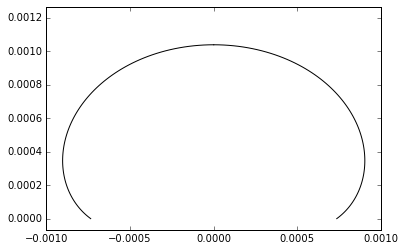

In [17]:
newB = fmin(func=findB, x0=initialB, disp=0)

B = newB[0]
yy = odeint(droplet_ode, yinit, psis)
x = yy[:,0]
y = yy[:,1]
plt.plot(y,x-x[-1],'k',-y,x-x[-1],'k') #plot left and right side of the droplet
plt.axis('equal'); #keep aspect ratio between axis

The whole progam in one piece is available [here](12a_Sessile Droplet Code.ipynb).

In [11]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom2.css", "r").read()
    return HTML(styles)
css_styling()